# HIGO Chalenge Test

## 1. Introduction

Challenge Test Data Scientist: Membuat Analisis Data

 Requirement:

Buatlah sample data untuk bahan analisis

Buatkan Analisis Data tersebut berdasarkan variable berikut ini: Nama Lokasi, Jam Login, Nama, Email, No Telp, Tahun Lahir, Merek HP, Digital Interest, Location Type

Kembangkan variable diatas menjadi beberapa variable baru (Nilai Plus)

Membuat System Confidence Interval (Nilai Plus)


Result: Kirimkan dalam bentuk PPT dan file pendukung lainnya seperti python script atau R script, etc

## 2. Libraries

In [1]:
from faker import Faker
from faker.providers import BaseProvider
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, silhouette_score, silhouette_samples
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import pickle

## 3. Creating the Dataset

In [2]:
# Mendefinisikan faker dengan seting localization Indonesia
f = Faker(['id_ID'])

In [3]:
# Membuat variable jam login
hour = []

for i in range(5000):
    f_hour = f.time(pattern='%H:%M')
    hour.append(f_hour)

hour[:5]

['12:17', '22:34', '09:21', '07:04', '03:59']

In [4]:
# Membuat variable nama
name = []

for i in range(5000):
    f_name = f.first_name()
    name.append(f_name)

name[:5]

['Lanjar', 'Wasis', 'Jaga', 'Jefri', 'Tasdik']

In [5]:
# Membuat variable no telp
p_number = []

for i in range(5000):
    f_p_number = f.numerify('8#########')
    p_number.append(f_p_number)

p_number[:5]

['8887729249', '8666823635', '8147275434', '8446855995', '8622699441']

In [6]:
# Membuat variable tahun lahir
dob = []

for i in range(5000):
    f_dob = f.date_of_birth(minimum_age=15, maximum_age=60)
    dob.append(f_dob)

dob[:5]

[datetime.date(1976, 3, 6),
 datetime.date(1977, 6, 11),
 datetime.date(2001, 4, 4),
 datetime.date(2001, 5, 22),
 datetime.date(1997, 7, 18)]

In [7]:
# Membuat custom faker provider untuk membantu membuat varibel digital interest, merek hp dan location type
class NeuralProvider(BaseProvider):

    # Mendefinisikan fungsi provider untuk merek hp
    def phone_brand(self):
        return random.choice(['samsung', 'apple', 'xiaomi', 'vivo', 'oppo'])

    # Mendefinisikan fungsi provider untuk digital interest
    def dig_interest(self):
        return random.choice(['sport', 'tech', 'beauty', 'cooking', 'entertainment', 'art', 'science', 'games', 'music'])

    # Mendefinisikan fungsi provider untuk location name
    def location_name(self):
        return random.choice(['Tang City Mall', 'Jogja City Mall', 'Grand Metropolitan Mall', 'SMA N 27 Jakarta', 'SMA N 28 Jakarta', 'SMA N 47 Jakarta', 
                            'Foresthree Coffee', 'Coffee Toffee', 'Stuja Coffee'])

# Menambahkan fungsi ke library faker
f.add_provider(NeuralProvider)

In [8]:
# Membuat variable digital interest
interest = []

for i in range(5000):
    f_int = f.dig_interest()
    interest.append(f_int)

interest[:5]

['tech', 'music', 'art', 'games', 'cooking']

In [9]:
# Membuat variable merek hp
p_brand = []

for i in range(5000):
    f_brand = f.phone_brand()
    p_brand.append(f_brand)

p_brand[:5]

['samsung', 'apple', 'samsung', 'samsung', 'apple']

In [10]:
# Membuat variable location type
loc_name = []

for i in range(5000):
    f_loc = f.location_name()
    loc_name.append(f_loc)

loc_name[:5]

['SMA N 27 Jakarta',
 'Jogja City Mall',
 'Stuja Coffee',
 'Jogja City Mall',
 'Foresthree Coffee']

In [11]:
# Menyatukan variabel yang sudah dibuat menjadi satu list
var_list = list(zip(loc_name, hour, name, p_number, dob, p_brand, interest))

# Membuat dataframe berdsarkan variabel yang sudah dibuat
df = pd.DataFrame(var_list, columns=['Nama_Lokasi', 'Jam_Login', 'Nama', 'No_Telp', 'Tahun_Lahir', 'Merek_HP', 'Digital_Interest'])
df.head(5)

Nama_Lokasi Jam_Login    Nama     No_Telp Tahun_Lahir Merek_HP  \
0   SMA N 27 Jakarta     12:17  Lanjar  8887729249  1976-03-06  samsung   
1    Jogja City Mall     22:34   Wasis  8666823635  1977-06-11    apple   
2       Stuja Coffee     09:21    Jaga  8147275434  2001-04-04  samsung   
3    Jogja City Mall     07:04   Jefri  8446855995  2001-05-22  samsung   
4  Foresthree Coffee     03:59  Tasdik  8622699441  1997-07-18    apple   

  Digital_Interest  
0             tech  
1            music  
2              art  
3            games  
4          cooking

In [12]:
# Membuat variabel location type

loc_type = []

for i in range(0, len(df)):
    if 'SMA' in df.iloc[i,0]:
        type = 'Goes to School'
    elif 'Mall' in df.iloc[i,0]:
        type = 'Free'
    else :
        type = 'Social'
    loc_type.append(type)
    
loc_type[:5]

['Goes to School', 'Free', 'Social', 'Free', 'Social']

In [13]:
# Menambahkan variabel location type ke dalam dataframe
df['Location_Type'] = loc_type

In [14]:
# Membuat variable email berdasarkan nama + domain google
df['Email'] = (df['Nama'] + '@google.com')
df['Email'].head(3)

0    Lanjar@google.com
1     Wasis@google.com
2      Jaga@google.com
Name: Email, dtype: object

In [15]:
# Mengubah posisi kolom email agar sesuai dengan format ketentuan chalenge
move_col = df.pop('Email')
df.insert(3, 'Email', move_col)

In [16]:
# Mendefinisikan tanggal saat ini untuk membantu menghitung usia customer
now = pd.to_datetime('today')

# Membuat varibel usia dengan mengurangkan tanggal saat ini dengan  tahun lahir customer
df['Tahun_Lahir'] = pd.to_datetime(df['Tahun_Lahir'])
df['Usia'] = np.round(((now - df['Tahun_Lahir']).dt.days)/365)
df.head(3)

Nama_Lokasi Jam_Login    Nama              Email     No_Telp  \
0  SMA N 27 Jakarta     12:17  Lanjar  Lanjar@google.com  8887729249   
1   Jogja City Mall     22:34   Wasis   Wasis@google.com  8666823635   
2      Stuja Coffee     09:21    Jaga    Jaga@google.com  8147275434   

  Tahun_Lahir Merek_HP Digital_Interest   Location_Type  Usia  
0  1976-03-06  samsung             tech  Goes to School  47.0  
1  1977-06-11    apple            music            Free  46.0  
2  2001-04-04  samsung              art          Social  22.0

In [17]:
# Membuat variabel jam login rounded untuk membantu menganalisis perilaku customer setiap jamnya
df['Jam_Login_Rounded'] = pd.to_datetime(df['Jam_Login'])
df['Jam_Login_Rounded'] = df['Jam_Login_Rounded'].dt.round('H').dt.hour
df['Jam_Login_Rounded'].unique()

array([12, 23,  9,  7,  4, 21, 16,  6, 20,  3,  8, 15, 10, 19, 13, 11, 22,
       18,  1,  5,  2,  0, 17, 14], dtype=int64)

In [18]:
# Save final dataset
df.to_csv('dataset.csv', index=False)

In [19]:
# Load final dataset
data = pd.read_csv('dataset.csv')

In [20]:
# Preview dataset final
data.head(5)

Nama_Lokasi Jam_Login    Nama              Email     No_Telp  \
0   SMA N 27 Jakarta     12:17  Lanjar  Lanjar@google.com  8887729249   
1    Jogja City Mall     22:34   Wasis   Wasis@google.com  8666823635   
2       Stuja Coffee     09:21    Jaga    Jaga@google.com  8147275434   
3    Jogja City Mall     07:04   Jefri   Jefri@google.com  8446855995   
4  Foresthree Coffee     03:59  Tasdik  Tasdik@google.com  8622699441   

  Tahun_Lahir Merek_HP Digital_Interest   Location_Type  Usia  \
0  1976-03-06  samsung             tech  Goes to School  47.0   
1  1977-06-11    apple            music            Free  46.0   
2  2001-04-04  samsung              art          Social  22.0   
3  2001-05-22  samsung            games            Free  22.0   
4  1997-07-18    apple          cooking          Social  25.0   

   Jam_Login_Rounded  
0                 12  
1                 23  
2                  9  
3                  7  
4                  4

In [21]:
# Preview dataset final
data.tail(5)

Nama_Lokasi Jam_Login      Nama                Email     No_Telp  \
4995    Jogja City Mall     11:46       Ida       Ida@google.com  8732285161   
4996  Foresthree Coffee     00:29      Gina      Gina@google.com  8887020018   
4997    Jogja City Mall     23:50     Citra     Citra@google.com  8549209201   
4998      Coffee Toffee     11:46  Estiawan  Estiawan@google.com  8653129492   
4999     Tang City Mall     21:13     Luwar     Luwar@google.com  8821629256   

     Tahun_Lahir Merek_HP Digital_Interest Location_Type  Usia  \
4995  1976-10-13  samsung              art          Free  46.0   
4996  1979-10-04  samsung            sport        Social  43.0   
4997  1996-07-13  samsung            music          Free  26.0   
4998  1972-10-17     oppo          cooking        Social  50.0   
4999  1990-06-09  samsung    entertainment          Free  33.0   

      Jam_Login_Rounded  
4995                 12  
4996                  0  
4997                  0  
4998                 12  
4999                 21

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama_Lokasi        5000 non-null   object 
 1   Jam_Login          5000 non-null   object 
 2   Nama               5000 non-null   object 
 3   Email              5000 non-null   object 
 4   No_Telp            5000 non-null   int64  
 5   Tahun_Lahir        5000 non-null   object 
 6   Merek_HP           5000 non-null   object 
 7   Digital_Interest   5000 non-null   object 
 8   Location_Type      5000 non-null   object 
 9   Usia               5000 non-null   float64
 10  Jam_Login_Rounded  5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


* Dataset final yang telah dibuat terdiri dari 5000 baris dan 11 kolom
* Tidak terdapat missing value dalam dataset

## 4. Exploratory Data Analysis

Bagaimana frequensi login customer pada setiap jamnya?

In [23]:
data['Jam_Login'].value_counts().head()

05:27    13
13:42    12
17:54    11
08:25    11
04:52    10
Name: Jam_Login, dtype: int64

Text(0.5, 1.0, 'Frekuensi Login tiap Jam')

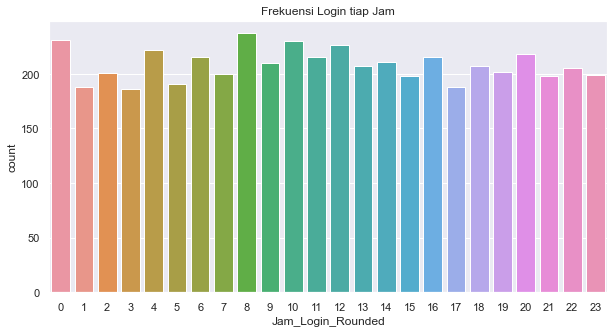

In [24]:
sns.set()
plt.figure(figsize=(10, 5))
sns.countplot(x='Jam_Login_Rounded', data=data)
plt.title('Frekuensi Login tiap Jam')

Diketahui 3 jam login dengan frekuensi paling tinggi adalah pukul 17.00, 20.00 dan 10.00. Sementara itu menit dengan frekuensi login terbanyak adalah pukul 23.17

Bagaimana frekuensi login pada setiap lokasi?

Text(0.5, 1.0, 'Frekuensi Login tiap Lokasi')

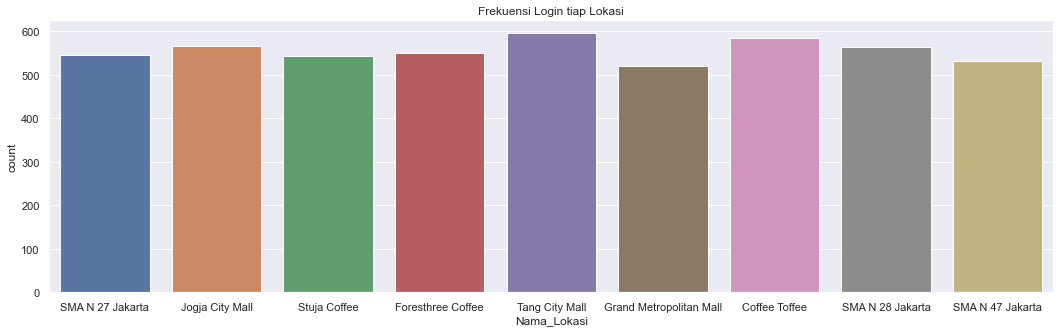

In [25]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Nama_Lokasi', data=data)
plt.title('Frekuensi Login tiap Lokasi')

Lokasi dengan frekuensi login paling banyak adalh Stuja Coffee, disusul kemudian oleh SMA N 27 Jakarta dan Jogja City Mall

Bagaimana frekuensi login tiap jamnya sesuai dengan lokasi?

In [26]:
data.groupby('Nama_Lokasi')['Jam_Login_Rounded'].value_counts().nlargest(10)

Nama_Lokasi        Jam_Login_Rounded
Coffee Toffee      8                    44
Foresthree Coffee  19                   36
Stuja Coffee       9                    36
Tang City Mall     13                   35
Coffee Toffee      2                    34
Foresthree Coffee  12                   34
SMA N 47 Jakarta   21                   33
Coffee Toffee      22                   32
SMA N 27 Jakarta   16                   32
                   22                   32
Name: Jam_Login_Rounded, dtype: int64

Stuja Coffee memiliki frekuensi login paling tinggi pada pukul 17.00. Meskipun demikian rata-rata login pada lokasi tersebut terjadi sebelum pukul 12.00. Sehingga kemungkinan besar pengunjung yang login di lokasi tersebut kebanyakan login sebelum pukul 12.00.

Text(0.5, 1.0, 'Jam Login tiap Lokasi')

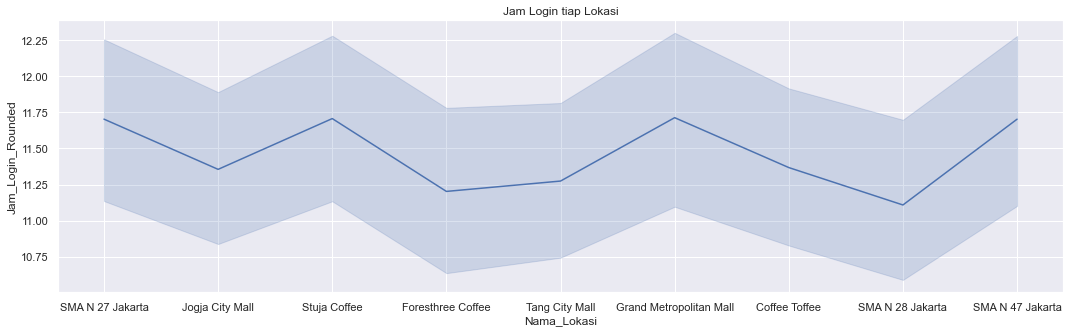

In [27]:
plt.figure(figsize=(18, 5))
sns.lineplot(x='Nama_Lokasi', data=data, y='Jam_Login_Rounded')
plt.title('Jam Login tiap Lokasi')

Rata-rata jam login paling awal Jogja City Mall dan jam login paling larut adalah Tang City Jakarta.

Bagaimana frekuensi login setiap location tipe?

In [28]:
data['Location_Type'].value_counts()

Free              1681
Social            1677
Goes to School    1642
Name: Location_Type, dtype: int64

Text(0.5, 1.0, 'Frekuensi Login sesuai Location Type')

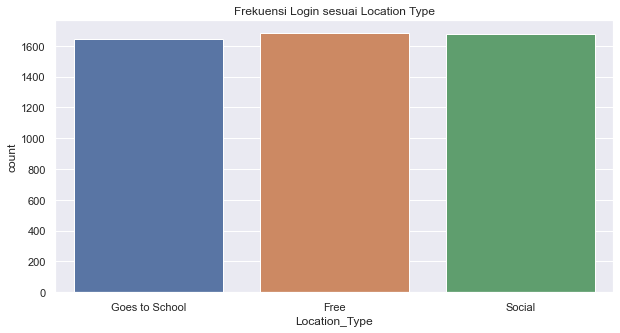

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Location_Type', data=data)
plt.title('Frekuensi Login sesuai Location Type')

Frekuensi login terbanyak ditemukan pada location type Social dengan 1696 login. Perbedaan frekuensi login setiap location type tidak terpaut angka yang cukup jauh.

Bagaimana frekuensi login tiap jamnya pada masing-masing location type?

In [30]:
data.groupby('Location_Type')['Jam_Login_Rounded'].value_counts().nlargest(10)

Location_Type   Jam_Login_Rounded
Social          8                    91
Free            11                   88
Goes to School  4                    85
Free            13                   83
Social          0                    83
Goes to School  15                   81
Social          10                   81
Free            16                   80
Social          12                   80
Free            5                    78
Name: Jam_Login_Rounded, dtype: int64

Frekuensi login paling tinggi untuk location type Social adalah pukul 17.00. Frekuensi login pada location type Free juga paling banyak ditemukan pada pukul 17.00. Sementara itu location type Goes to School memiliki frekuensi login palling tinggi pada pukul 10.00.

Text(0.5, 1.0, 'Frekuensi Jam Login setiap Location TYpe')

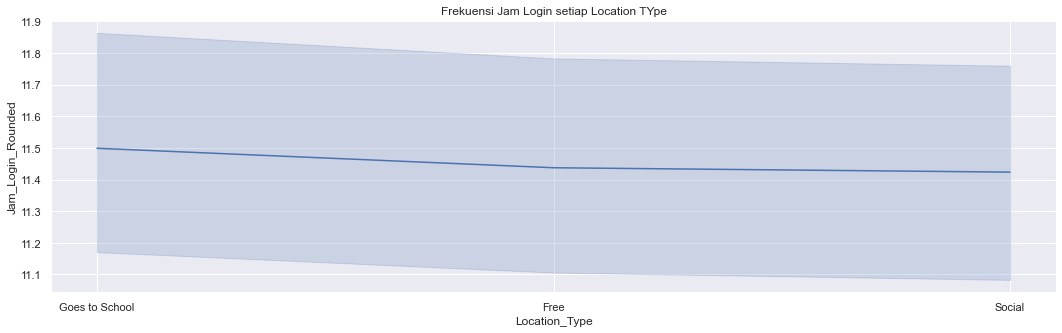

In [44]:
plt.figure(figsize=(18, 5))
sns.lineplot(x='Location_Type', data=data, y='Jam_Login_Rounded')
plt.title('Frekuensi Jam Login setiap Location TYpe')

Rata-rata frekuensi login dengan jam paling awal ditemukan pada location type Free dan yang paling larut ditemukan pada location type Goes to School.

Bagaimana frekuensi login pada tiap diital interest?

In [32]:
data['Digital_Interest'].value_counts()

tech             596
sport            583
games            564
cooking          560
beauty           559
music            550
art              541
entertainment    530
science          517
Name: Digital_Interest, dtype: int64

Text(0.5, 1.0, 'Frekuensi Login tiap Interest')

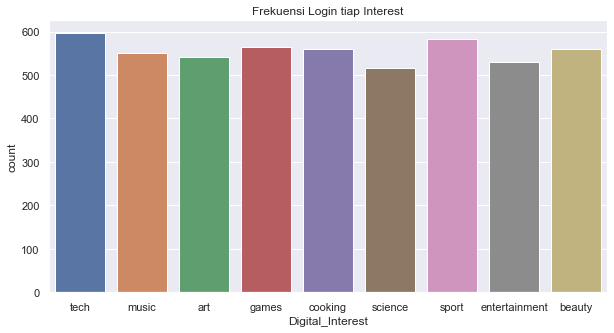

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Digital_Interest', data=data)
plt.title('Frekuensi Login tiap Interest')

Terdapat 3 digital interest dengan frekuensi paling tinggi yang ditemukan yaitu Tech dengan frekuensi 581, sport dengan frekuensi 576, dan games dengan frekuensi 572

Bagaimana jam login pada setiap digital interest?

In [34]:
data.groupby('Digital_Interest')['Jam_Login_Rounded'].value_counts().nlargest(10)

Digital_Interest  Jam_Login_Rounded
beauty            0                    36
entertainment     16                   35
tech              4                    35
beauty            10                   34
games             0                    34
beauty            12                   33
                  20                   33
cooking           3                    33
sport             5                    33
tech              7                    33
Name: Jam_Login_Rounded, dtype: int64

Terdapat tiga digital interest dengan frekuensi login yang terbanyak setiap jamnya yaitu yang pertama digital interest dengan frekuensi diakses paling banyak adalah beauty pada pukul 9.00. Disusul selanjutnya tech dengan jam login pukul 17.00 dan beauty lagi dengan jam login 10.00

Text(0.5, 1.0, 'Jam Login tiap Lokasi')

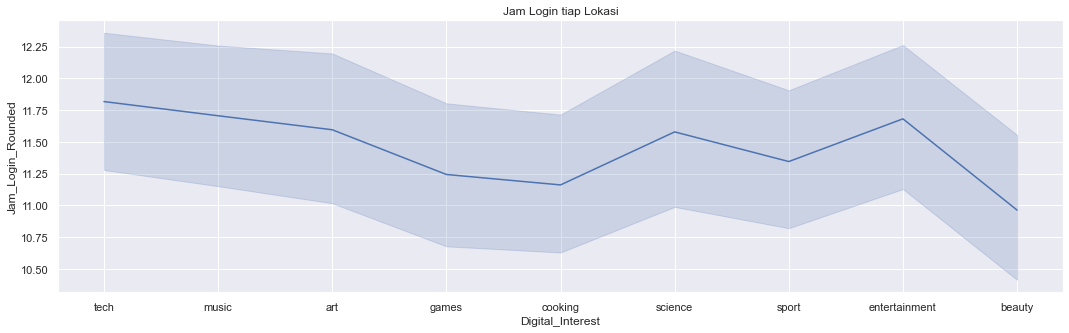

In [35]:
plt.figure(figsize=(18, 5))
sns.lineplot(x='Digital_Interest', data=data, y='Jam_Login_Rounded')
plt.title('Jam Login tiap Lokasi')

Rata-rata interest dengan jam login paling awal adalah music dan yang paling larut adalah science

Bagaimana interest pada tiap location type?

Text(0.5, 1.0, 'DIgital Interest tiap Lokasi')

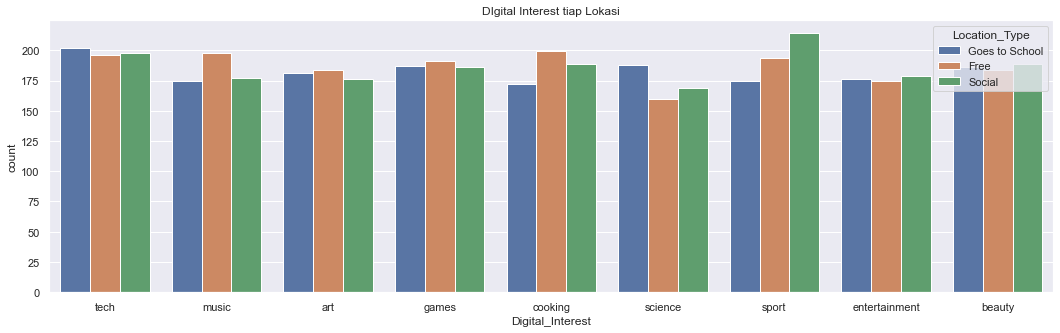

In [36]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Digital_Interest', data=data, hue='Location_Type')
plt.title('DIgital Interest tiap Lokasi')

Interest yang paling poluper pada location type social adalah tech, game dan music. Sementara itu untuk location type free adalah games, tech dan beauty. Pada location type goes to school yang paling populer adalah sport, beauty dan tech

Bagaimana frekuensi login setiap merek hp?

In [37]:
data['Merek_HP'].value_counts()

xiaomi     1037
samsung    1007
apple       996
vivo        992
oppo        968
Name: Merek_HP, dtype: int64

Text(0.5, 1.0, 'Frekuensi Merek HP Customer')

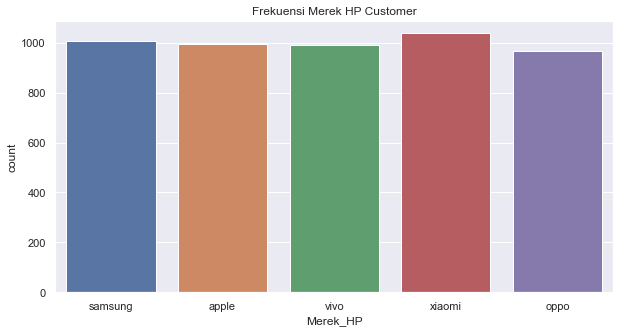

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Merek_HP', data=data)
plt.title('Frekuensi Merek HP Customer')

Urutan frekuensi login masing-masing merek hp dari yang tertinggi ke terendah adalah Vivo, Xiaomi, Oppo, Samsung dan Apple

Text(0.5, 1.0, 'Frekuensi Jam Login tiap Merek HP')

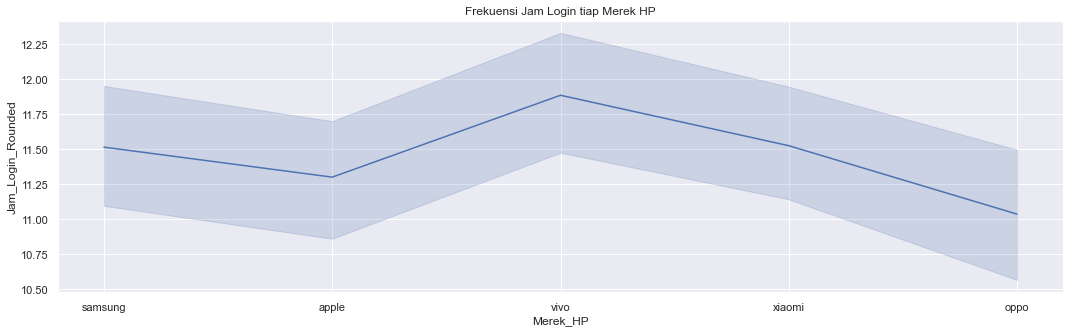

In [39]:
plt.figure(figsize=(18, 5))
sns.lineplot(x='Merek_HP', data=data, y='Jam_Login_Rounded')
plt.title('Frekuensi Jam Login tiap Merek HP')

Rata-rata jam login yang paling pagi adalah Apple dan yang paling larut adalah Xiaomi

Bagaimana frekuensi login setiap usia?

In [40]:
data['Usia'].value_counts().head(5)

29.0    129
24.0    125
59.0    122
60.0    120
19.0    119
Name: Usia, dtype: int64

Usia dengan login terbanyak adalah 36 tahun dan mayoritas pada usia 30an.

Text(0.5, 1.0, 'Distribusi Usia Customer')

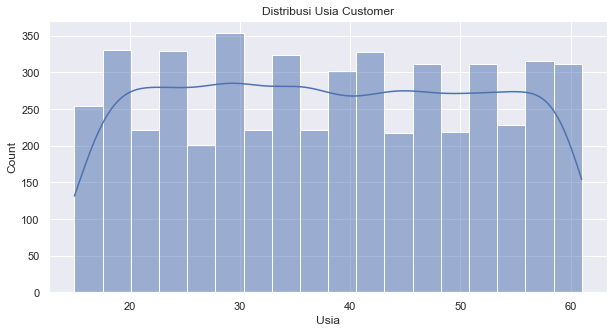

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Usia', data=data, kde=True)
plt.title('Distribusi Usia Customer')

In [42]:
data['Usia'].skew()

0.01507445007791916

Usia dalam dataset memiliki distribusi yang tergolong normal.

Text(0.5, 1.0, 'Frekuensi Jam Login tiap Usia')

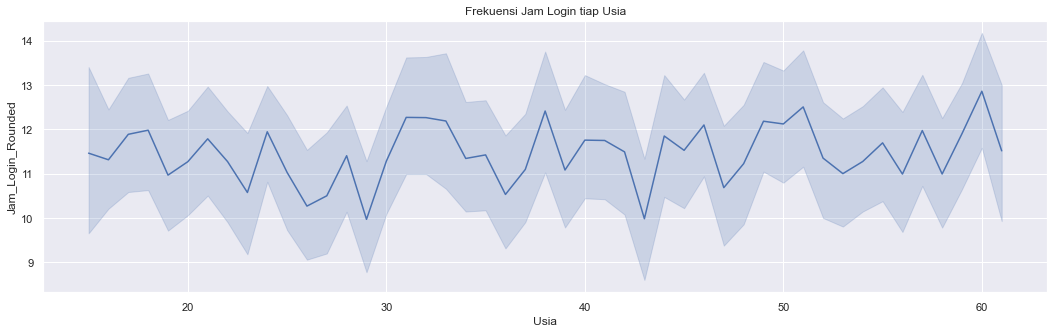

In [43]:
plt.figure(figsize=(18, 5))
sns.lineplot(x='Usia', data=data, y='Jam_Login_Rounded')
plt.title('Frekuensi Jam Login tiap Usia')

TIdak ditemukan pola yang signifikan pada grafik visualisasi jam login berdasarkan usia. Usia dengan jam login paling awal adalah usia 20. Sedangkan usia dengan login paling larut adalah 16

Text(0.5, 1.0, 'Interest tiap Usia')

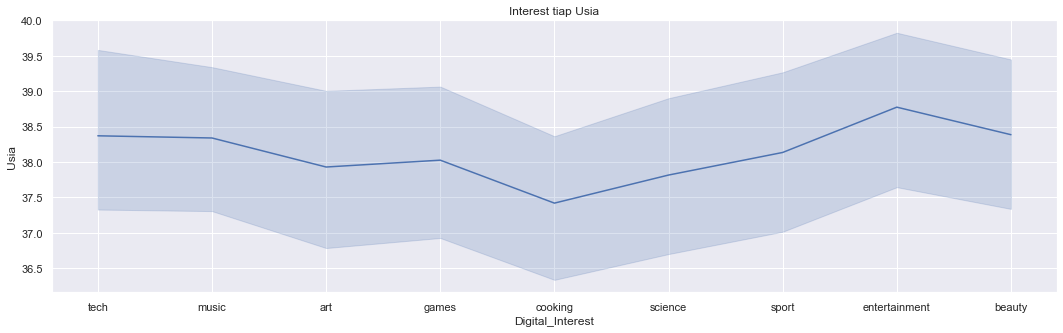

In [47]:
plt.figure(figsize=(18, 5))
sns.lineplot(x='Digital_Interest', data=data, y='Usia')
plt.title('Interest tiap Usia')

## 5. Data Preprocessing

In [227]:
# Membuat backup raw data untuk membantu pengecekan bila diperlukan
raw = data.copy()

In [228]:
raw

Nama_Lokasi Jam_Login     Nama               Email     No_Telp  \
0         Coffee Toffee     11:13  Maryadi  Maryadi@google.com  8537148750   
1        Tang City Mall     17:37    Satya    Satya@google.com  8429583113   
2          Stuja Coffee     16:20  Salimah  Salimah@google.com  8031899902   
3      SMA N 28 Jakarta     15:00    Ratna    Ratna@google.com  8878632963   
4         Coffee Toffee     10:04   Ismail   Ismail@google.com  8755392957   
...                 ...       ...      ...                 ...         ...   
4995      Coffee Toffee     17:19  Chandra  Chandra@google.com  8322568857   
4996      Coffee Toffee     08:37     Koko     Koko@google.com  8368215916   
4997   SMA N 28 Jakarta     15:36  Kasusra  Kasusra@google.com  8225615151   
4998  Foresthree Coffee     13:13     Reza     Reza@google.com  8278236068   
4999       Stuja Coffee     22:07      Ifa      Ifa@google.com  8898686221   

     Tahun_Lahir Merek_HP Digital_Interest   Location_Type  Usia  \
0     1982-11-04   xiaomi          cooking          Social  40.0   
1     1968-08-11   xiaomi           beauty            Free  54.0   
2     2006-04-21   xiaomi          cooking          Social  17.0   
3     1986-02-17  samsung          cooking  Goes to School  37.0   
4     1984-01-14     vivo             tech          Social  39.0   
...          ...      ...              ...             ...   ...   
4995  1993-06-20     vivo            games          Social  29.0   
4996  1972-08-26   xiaomi            sport          Social  50.0   
4997  1967-01-12     oppo    entertainment  Goes to School  56.0   
4998  1964-08-16     oppo          science          Social  58.0   
4999  1989-11-06     vivo            games          Social  33.0   

      Jam_Login_Rounded  
0                    11  
1                    18  
2                    16  
3                    15  
4                    10  
...                 ...  
4995                 17  
4996                  9  
4997                 16  
4998                 13  
4999                 22  

[5000 rows x 11 columns]

### 5.1 Handling Duplicate Data

In [229]:
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Nama_Lokasi, Jam_Login, Nama, Email, No_Telp, Tahun_Lahir, Merek_HP, Digital_Interest, Location_Type, Usia, Jam_Login_Rounded]
Index: []

Tidak ditemukan duplicate data dalam dataset

### 5.2 Handling Cardinality

In [230]:
data.head(1)

Nama_Lokasi Jam_Login     Nama               Email     No_Telp  \
0  Coffee Toffee     11:13  Maryadi  Maryadi@google.com  8537148750   

  Tahun_Lahir Merek_HP Digital_Interest Location_Type  Usia  Jam_Login_Rounded  
0  1982-11-04   xiaomi          cooking        Social  40.0                 11

In [231]:
print('Number of categories in the variable Nama_Lokasi         : {}'.format(len(data['Nama_Lokasi'].unique())))
print('Number of categories in the variable Jam_Login           : {}'.format(len(data['Jam_Login'].unique())))
print('Number of categories in the variable Nama                : {}'.format(len(data['Nama'].unique())))
print('Number of categories in the variable Email               : {}'.format(len(data['Email'].unique())))
print('Number of categories in the variable No_Telp             : {}'.format(len(data['No_Telp'].unique())))
print('Number of categories in the variable Tahun_Lahir         : {}'.format(len(data['Tahun_Lahir'].unique())))
print('Number of categories in the variable Merek_HP            : {}'.format(len(data['Merek_HP'].unique())))
print('Number of categories in the variable Digital_Interest    : {}'.format(len(data['Digital_Interest'].unique())))
print('Number of categories in the variable Location_Type       : {}'.format(len(data['Location_Type'].unique())))

Number of categories in the variable Nama_Lokasi         : 9
Number of categories in the variable Jam_Login           : 1398
Number of categories in the variable Nama                : 705
Number of categories in the variable Email               : 705
Number of categories in the variable No_Telp             : 5000
Number of categories in the variable Tahun_Lahir         : 4385
Number of categories in the variable Merek_HP            : 5
Number of categories in the variable Digital_Interest    : 9
Number of categories in the variable Location_Type       : 3


Ditemukan variabel yang memiliki high cardinality yaitu Jam Login, Nama, Email, No Telp dan Tahun Lahir. Mayoritas variabel tersebut tidak bisa disederhanakan sehingga tidak akan digunakan sebagai vriabel feature untuk machine learning dan akan di drop dari dataset.

In [232]:
data.drop(columns=['Jam_Login', 'Nama', 'Email', 'No_Telp', 'Tahun_Lahir'], axis=1, inplace=True)

### 5.3 Handling Missing Values

In [233]:
data.isna().sum()

Nama_Lokasi          0
Merek_HP             0
Digital_Interest     0
Location_Type        0
Usia                 0
Jam_Login_Rounded    0
dtype: int64

Tidak ditemukan missing values dalam dataset

### 5.4 Get Data for Model Inference

In [234]:
data_inf = data.sample(10, random_state=50)
data_inf 

Nama_Lokasi Merek_HP Digital_Interest   Location_Type  Usia  \
3431            Coffee Toffee     oppo           beauty          Social  46.0   
2042         SMA N 27 Jakarta  samsung             tech  Goes to School  54.0   
79             Tang City Mall     vivo             tech            Free  31.0   
4663           Tang City Mall   xiaomi            music            Free  58.0   
3640  Grand Metropolitan Mall     oppo          cooking            Free  48.0   
65           SMA N 28 Jakarta   xiaomi          science  Goes to School  27.0   
1811          Jogja City Mall     vivo          science            Free  58.0   
1815         SMA N 27 Jakarta     vivo          science  Goes to School  46.0   
1727        Foresthree Coffee     oppo             tech          Social  46.0   
4918         SMA N 47 Jakarta     vivo           beauty  Goes to School  45.0   

      Jam_Login_Rounded  
3431                 13  
2042                 23  
79                   10  
4663                  6  
3640                 10  
65                   10  
1811                 14  
1815                 18  
1727                  3  
4918                  2

In [235]:
data_train = data.drop(data_inf.index)

In [236]:
data_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

Nama_Lokasi Merek_HP Digital_Interest   Location_Type  Usia  \
0            Coffee Toffee     oppo           beauty          Social  46.0   
1         SMA N 27 Jakarta  samsung             tech  Goes to School  54.0   
2           Tang City Mall     vivo             tech            Free  31.0   
3           Tang City Mall   xiaomi            music            Free  58.0   
4  Grand Metropolitan Mall     oppo          cooking            Free  48.0   
5         SMA N 28 Jakarta   xiaomi          science  Goes to School  27.0   
6          Jogja City Mall     vivo          science            Free  58.0   
7         SMA N 27 Jakarta     vivo          science  Goes to School  46.0   
8        Foresthree Coffee     oppo             tech          Social  46.0   
9         SMA N 47 Jakarta     vivo           beauty  Goes to School  45.0   

   Jam_Login_Rounded  
0                 13  
1                 23  
2                 10  
3                  6  
4                 10  
5                 10  
6                 14  
7                 18  
8                  3  
9                  2

### 5.5 Feature Scaling

In [237]:
# Memisahkan kolom numerik
num_cols = ['Usia', 'Jam_Login_Rounded']

data_train_num = data_train[num_cols]

In [238]:
# Scaling feature numerik
scaler = StandardScaler()
scaler.fit(data_train_num)
data_scaled = scaler.transform(data_train_num)
data_scaled

array([[ 0.13271253, -0.09062566],
       [ 1.1871078 ,  0.93415717],
       [-1.59950827,  0.64136207],
       ...,
       [ 1.3377357 ,  0.64136207],
       [ 1.4883636 ,  0.20216944],
       [-0.3944851 ,  1.51974735]])

### 5.6 Feature Encoding

In [239]:
# Memisahkan kolom numerik
cat_cols = ['Nama_Lokasi', 'Merek_HP', 'Digital_Interest', 'Location_Type']

data_train_cat = data_train[cat_cols]

In [240]:
# Scaling feature numerik
encoder = OneHotEncoder(sparse=False)
encoder.fit(data_train_cat)
data_encoded = encoder.transform(data_train_cat)
data_encoded

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### 5.7 Concat Feature

In [241]:
data_train_final = np.concatenate([data_scaled, data_encoded], axis=1)
data_train_final

array([[ 0.13271253, -0.09062566,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1871078 ,  0.93415717,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.59950827,  0.64136207,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.3377357 ,  0.64136207,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.4883636 ,  0.20216944,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.3944851 ,  1.51974735,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [242]:
lof = LocalOutlierFactor(n_neighbors = 20,contamination=.03)
data_train['lof'] = lof.fit_predict(data_train_final)
data_train

Nama_Lokasi Merek_HP Digital_Interest   Location_Type  Usia  \
0         Coffee Toffee   xiaomi          cooking          Social  40.0   
1        Tang City Mall   xiaomi           beauty            Free  54.0   
2          Stuja Coffee   xiaomi          cooking          Social  17.0   
3      SMA N 28 Jakarta  samsung          cooking  Goes to School  37.0   
4         Coffee Toffee     vivo             tech          Social  39.0   
...                 ...      ...              ...             ...   ...   
4985      Coffee Toffee     vivo            games          Social  29.0   
4986      Coffee Toffee   xiaomi            sport          Social  50.0   
4987   SMA N 28 Jakarta     oppo    entertainment  Goes to School  56.0   
4988  Foresthree Coffee     oppo          science          Social  58.0   
4989       Stuja Coffee     vivo            games          Social  33.0   

      Jam_Login_Rounded  lof  
0                    11    1  
1                    18    1  
2                    16    1  
3                    15    1  
4                    10    1  
...                 ...  ...  
4985                 17    1  
4986                  9    1  
4987                 16    1  
4988                 13    1  
4989                 22    1  

[4990 rows x 7 columns]

### 5.8 Dimension Reduction

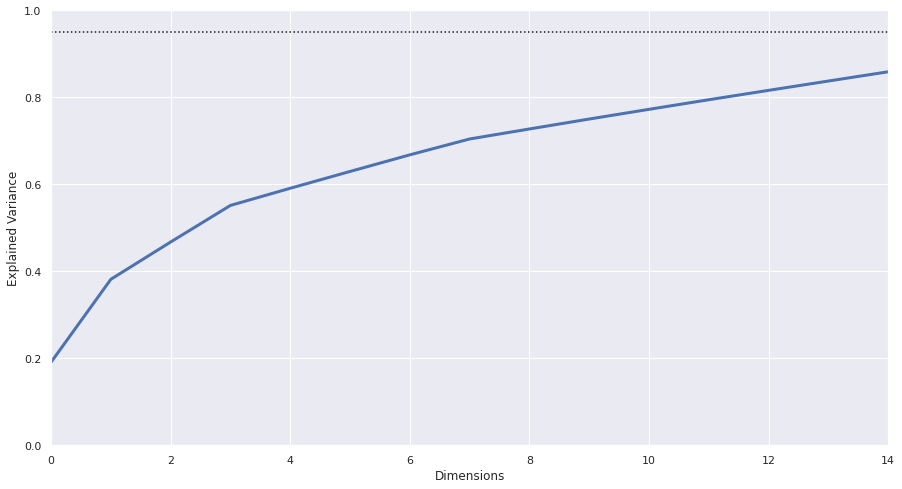

In [243]:
pca = PCA()
pca.fit(data_train_final)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.figure(figsize=(15,8))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()


Tidak ditemukan elbow point yang ideal untuk melakukan PCA. Sehingga dapat disimpulkan bahwa dataset kemungkinan besar tidak membutuhkan untuk dilakukan PCA karena dimensi data yang tergolong rendah.

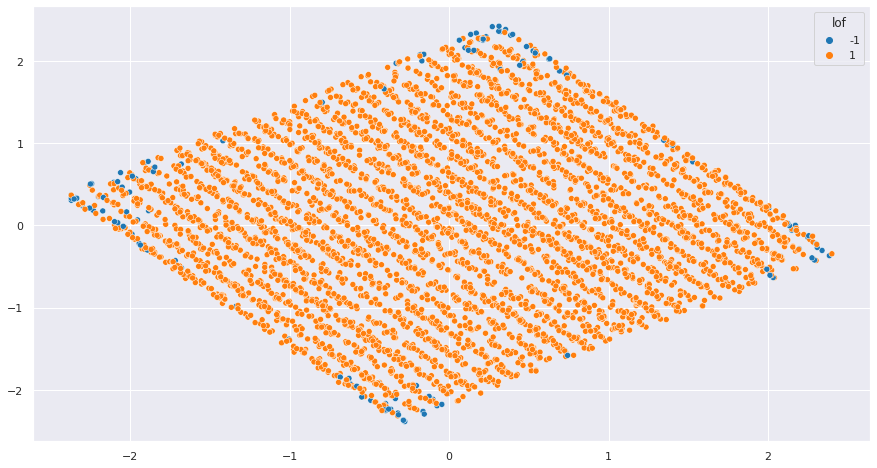

In [244]:
pca_red = PCA(n_components=7).fit_transform(data_train_final)
plt.figure(figsize=(15,8))
sns.scatterplot(x=pca_red[:,0],y=pca_red[:,1],hue=data_train.lof,palette="tab10")

## 6. Model Definition

Pada penelitian ini ada empat model machine learning yang akan dibuat yaitu :
- `KMEANS`
- `DBSCAN`
- `Spectral Clustering`

In [245]:
kmeans = KMeans()
dbscan = DBSCAN()
spectral = SpectralClustering()

## 7. Model Training

In [246]:
kmeans.fit(data_scaled)

KMeans()

In [247]:
dbscan.fit(data_scaled)

DBSCAN()

In [248]:
spectral.fit(data_scaled)

SpectralClustering()

## 8. Model Evaluation

Model evaluation akan dilakukan menggunakan silhouette score dan juga visualisasinya untuk menentukan jumlah cluster dari model. Setelah itu akan digunakan Calinski-Harabasz Score untuk menentukan model tternaik yang akan direkomendasikan

In [249]:
# Mendefinisikan fungsi evaluasi dan visualissasi dengan silhouette score
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

### 8.1 Evaluasi K-Means

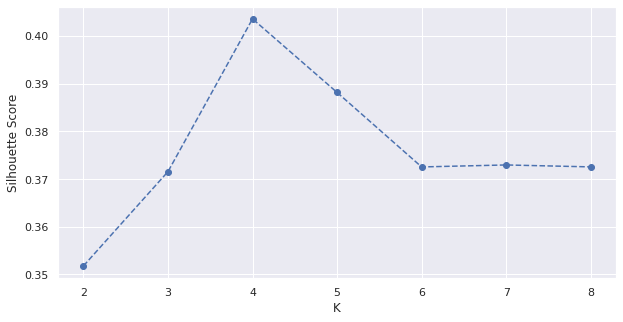

In [250]:
K=[2,3,4,5,6,7,8]
s_score_slc=[silhouette_score(data_scaled, KMeans(n_clusters=i).fit(data_scaled).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score_slc,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3517568511205542
For n_clusters = 3 The average silhouette_score is : 0.37594371302154905
For n_clusters = 4 The average silhouette_score is : 0.4035493433769589
For n_clusters = 5 The average silhouette_score is : 0.3877976063791608
For n_clusters = 6 The average silhouette_score is : 0.38241598958301765
For n_clusters = 7 The average silhouette_score is : 0.3719105793387534
For n_clusters = 8 The average silhouette_score is : 0.37251092702614513


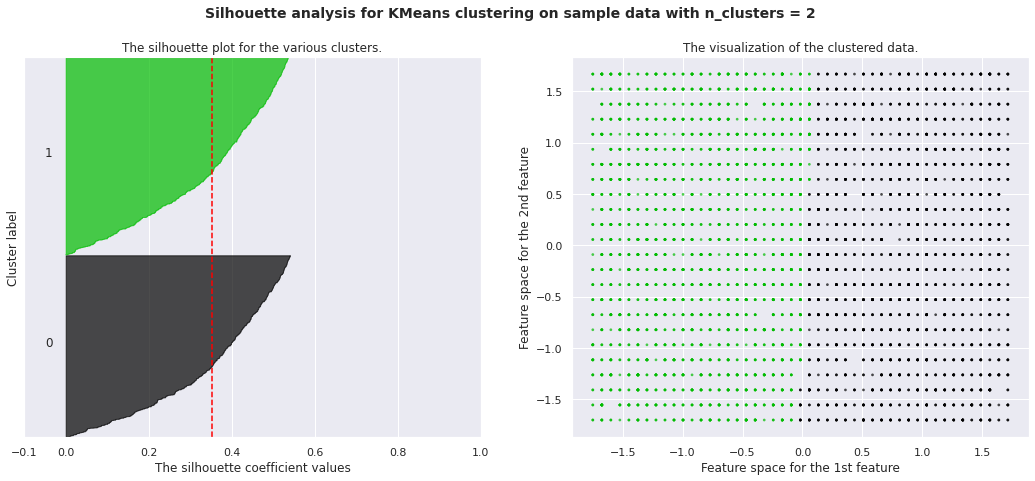

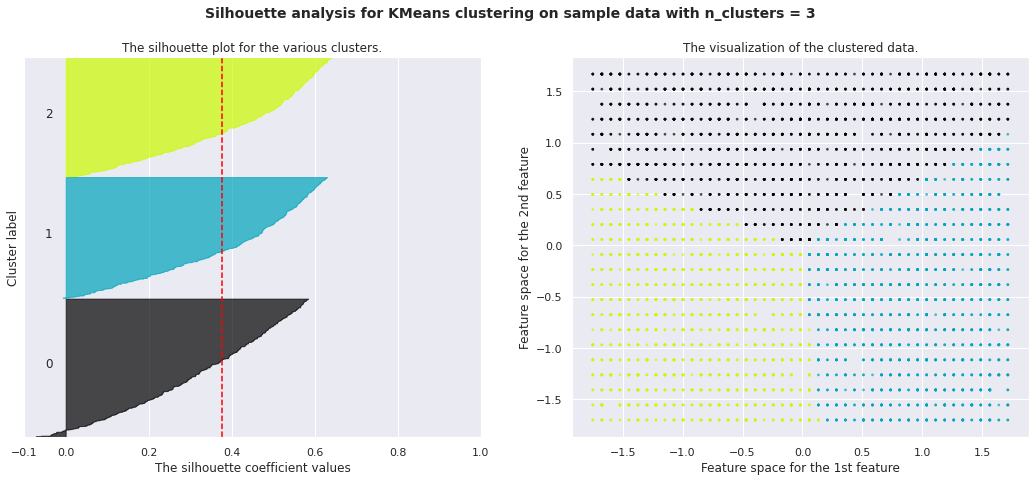

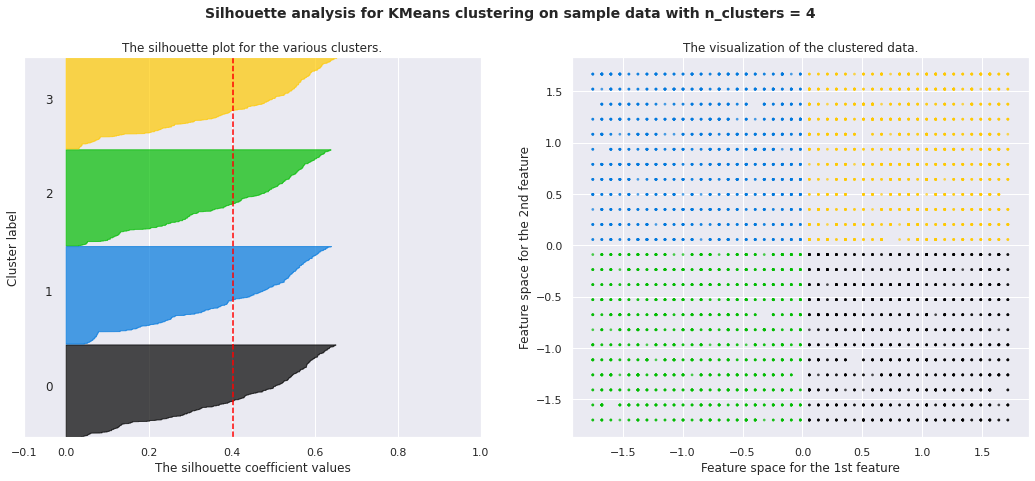

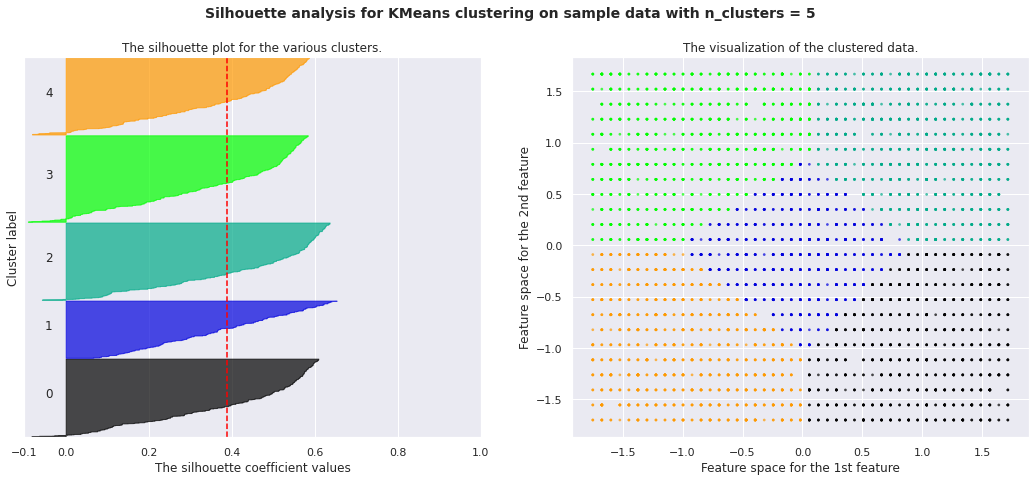

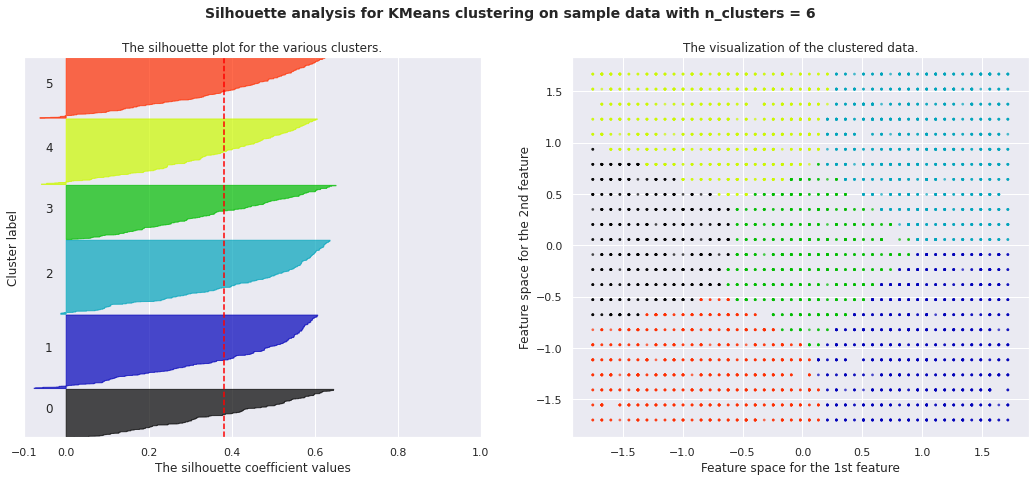

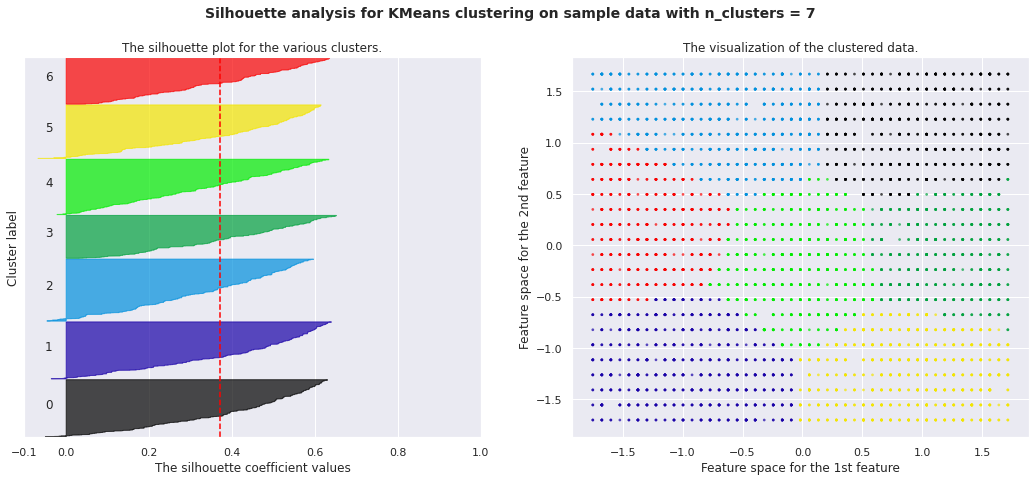

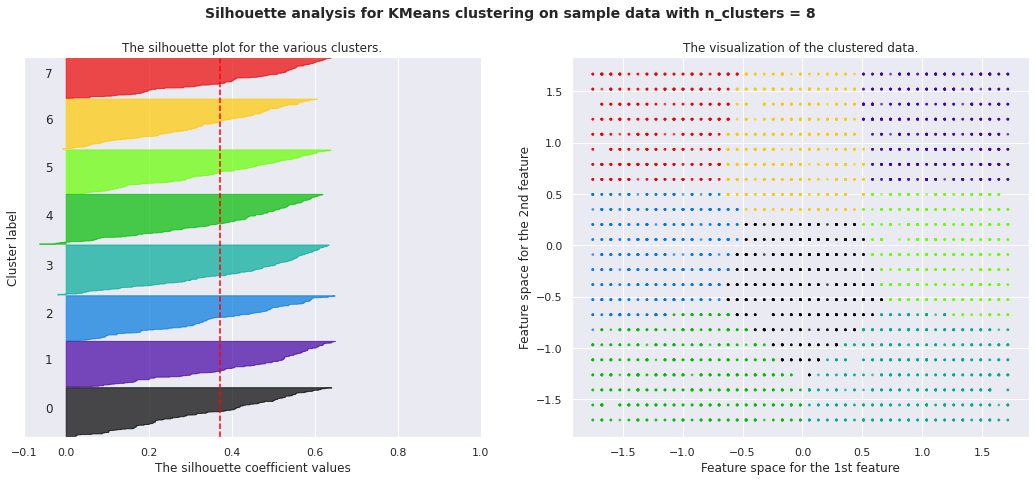

In [251]:
plot_silhouette(KMeans,K,data_scaled,'KMeans')

Berdasarkan evaluasi menggunakan silhouette score dan juga merujuk pada visualisasinya, jumlah cluster ideal untuk model KMeans Adalah 4 cluster

In [252]:
# Seting model KMeans untuk membuat 4 cluster
kmeans_tune = KMeans(n_clusters=4, random_state=50)
kmeans_tune.fit(data_scaled)

KMeans(n_clusters=4, random_state=50)

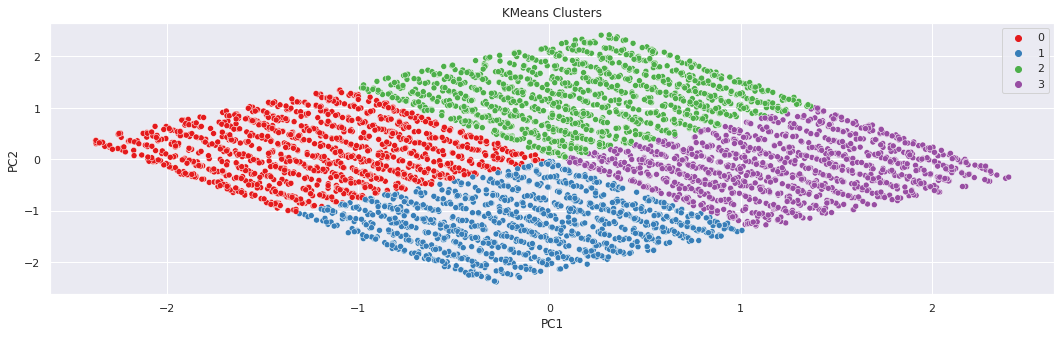

In [253]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x=pca_red[:, 0], y=pca_red[:, 1], hue=kmeans_tune.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

In [254]:
data_train['kmeans'] = kmeans_tune.fit_predict(data_train_final)
data_train

Nama_Lokasi Merek_HP Digital_Interest   Location_Type  Usia  \
0         Coffee Toffee   xiaomi          cooking          Social  40.0   
1        Tang City Mall   xiaomi           beauty            Free  54.0   
2          Stuja Coffee   xiaomi          cooking          Social  17.0   
3      SMA N 28 Jakarta  samsung          cooking  Goes to School  37.0   
4         Coffee Toffee     vivo             tech          Social  39.0   
...                 ...      ...              ...             ...   ...   
4985      Coffee Toffee     vivo            games          Social  29.0   
4986      Coffee Toffee   xiaomi            sport          Social  50.0   
4987   SMA N 28 Jakarta     oppo    entertainment  Goes to School  56.0   
4988  Foresthree Coffee     oppo          science          Social  58.0   
4989       Stuja Coffee     vivo            games          Social  33.0   

      Jam_Login_Rounded  lof  kmeans  
0                    11    1       2  
1                    18    1       3  
2                    16    1       1  
3                    15    1       1  
4                    10    1       2  
...                 ...  ...     ...  
4985                 17    1       1  
4986                  9    1       2  
4987                 16    1       3  
4988                 13    1       3  
4989                 22    1       1  

[4990 rows x 8 columns]

Text(0.5, 1.0, 'Cluster Proportion')

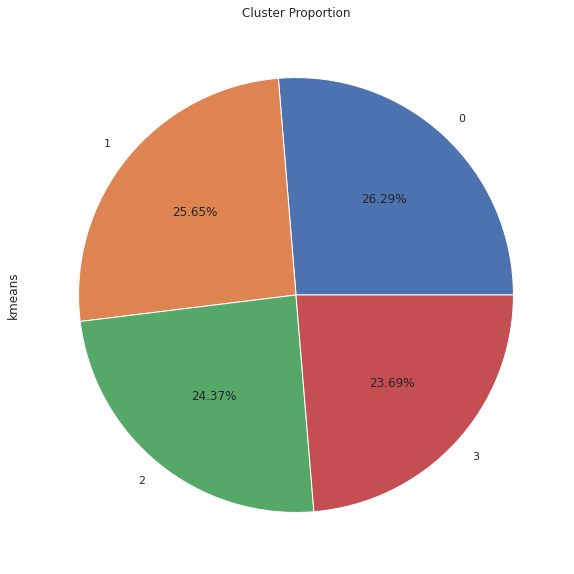

In [255]:
data_train['kmeans'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Cluster Proportion')

Cluster hasil dari pengelompokan model KMeans memiliki proporsi yang hampir sama besar

### 8.2 Evaluasi DBSCAN

In [256]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*data_train_final.shape[1])
    dbscan.fit(data_train_final)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

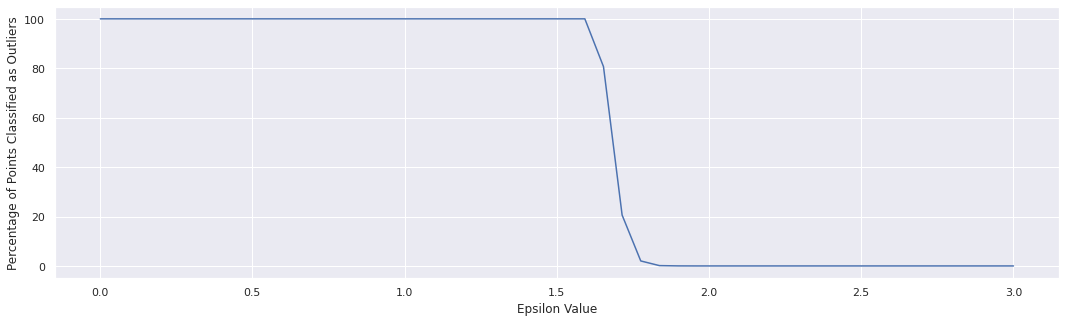

In [257]:
plt.figure(figsize=(18, 5))
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.show()

Merujuk pada visualisasi diatas maka besaaran epsilon yang terbaik untuk model DBSCAN adalah 1.8

In [283]:
dbs_tune = DBSCAN(eps=1.8, min_samples=5)
dbs_tune.fit(data_train_final)

DBSCAN(eps=1.8)

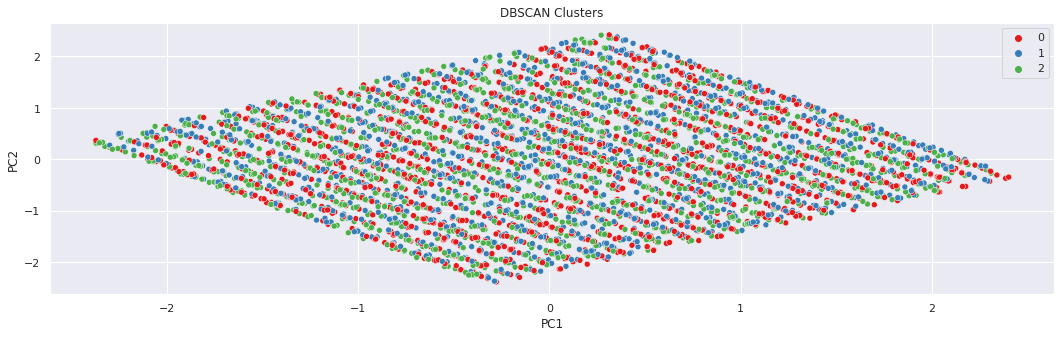

In [284]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x=pca_red[:, 0], y=pca_red[:, 1], hue=dbs_tune.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clusters')
plt.show()

In [285]:
data_train['dbscan'] = dbs_tune.fit_predict(data_train_final)
data_train

Nama_Lokasi Merek_HP Digital_Interest   Location_Type  Usia  \
0         Coffee Toffee   xiaomi          cooking          Social  40.0   
1        Tang City Mall   xiaomi           beauty            Free  54.0   
2          Stuja Coffee   xiaomi          cooking          Social  17.0   
3      SMA N 28 Jakarta  samsung          cooking  Goes to School  37.0   
4         Coffee Toffee     vivo             tech          Social  39.0   
...                 ...      ...              ...             ...   ...   
4985      Coffee Toffee     vivo            games          Social  29.0   
4986      Coffee Toffee   xiaomi            sport          Social  50.0   
4987   SMA N 28 Jakarta     oppo    entertainment  Goes to School  56.0   
4988  Foresthree Coffee     oppo          science          Social  58.0   
4989       Stuja Coffee     vivo            games          Social  33.0   

      Jam_Login_Rounded  lof  kmeans  dbscan  spectral  
0                    11    1       2       0         0  
1                    18    1       3       1         2  
2                    16    1       1       0         0  
3                    15    1       1       2         1  
4                    10    1       2       0         0  
...                 ...  ...     ...     ...       ...  
4985                 17    1       1       0         0  
4986                  9    1       2       0         0  
4987                 16    1       3       2         1  
4988                 13    1       3       0         0  
4989                 22    1       1       0         0  

[4990 rows x 10 columns]

Text(0.5, 1.0, 'Cluster Proportion')

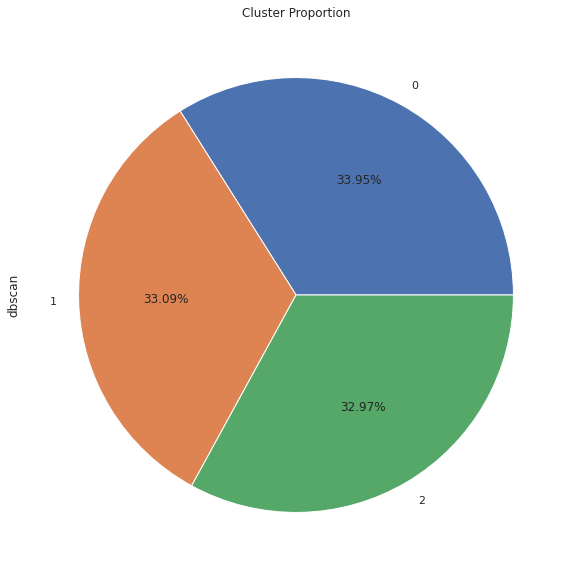

In [286]:
data_train['dbscan'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Cluster Proportion')

MOdel DBSCAN melakukan clustering pada dataset dengan proporsi yang hampir merata

### 8.3 Evaluasi Model Spectral Clustering

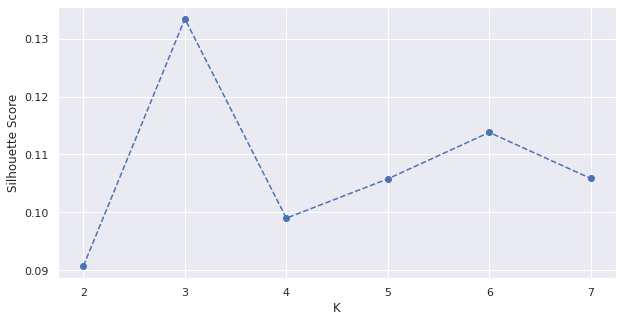

In [270]:
K=[2,3,4,5,6,7]
s_score_slc=[silhouette_score(data_train_final, SpectralClustering(n_clusters=i).fit(data_train_final).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score_slc,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.0907114004430951
For n_clusters = 3 The average silhouette_score is : 0.13344004387889732
For n_clusters = 4 The average silhouette_score is : 0.09899199153151954
For n_clusters = 5 The average silhouette_score is : 0.10632631128528651
For n_clusters = 6 The average silhouette_score is : 0.11380565800536681
For n_clusters = 7 The average silhouette_score is : 0.10771435959629365


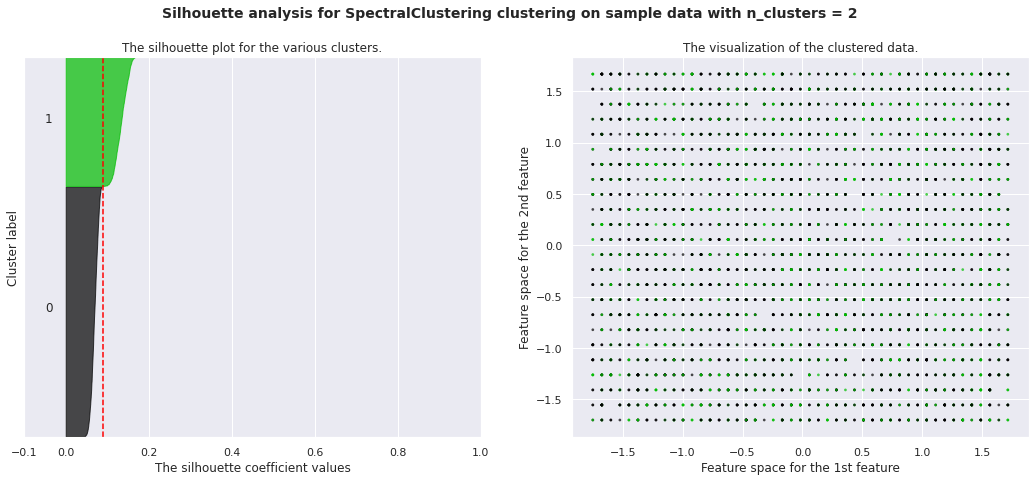

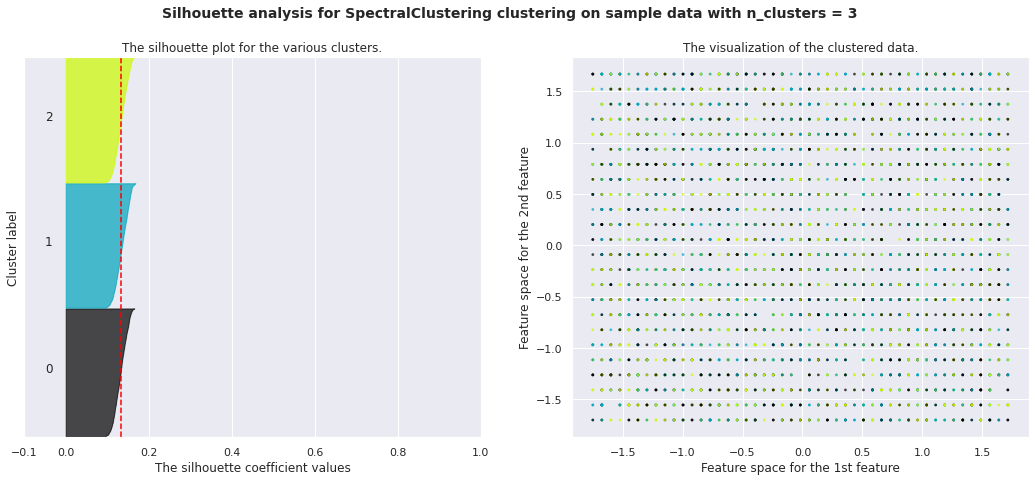

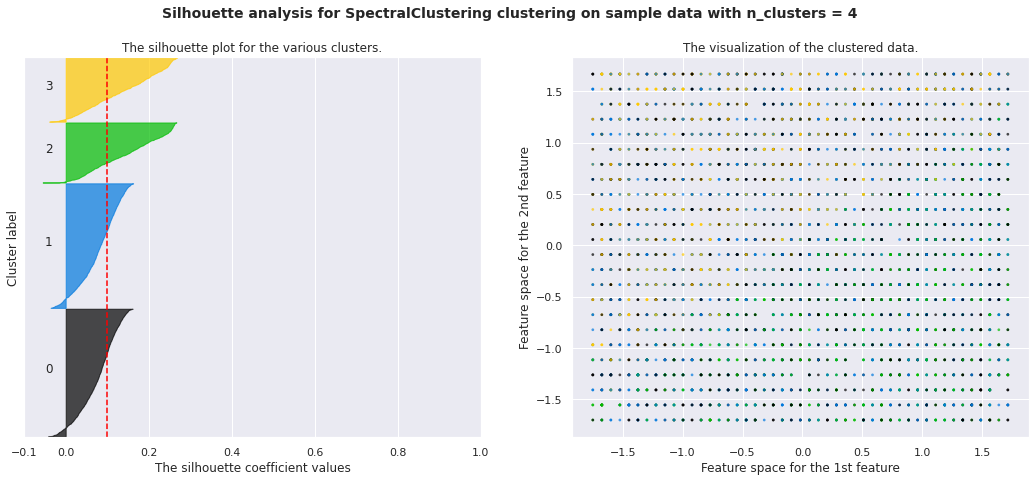

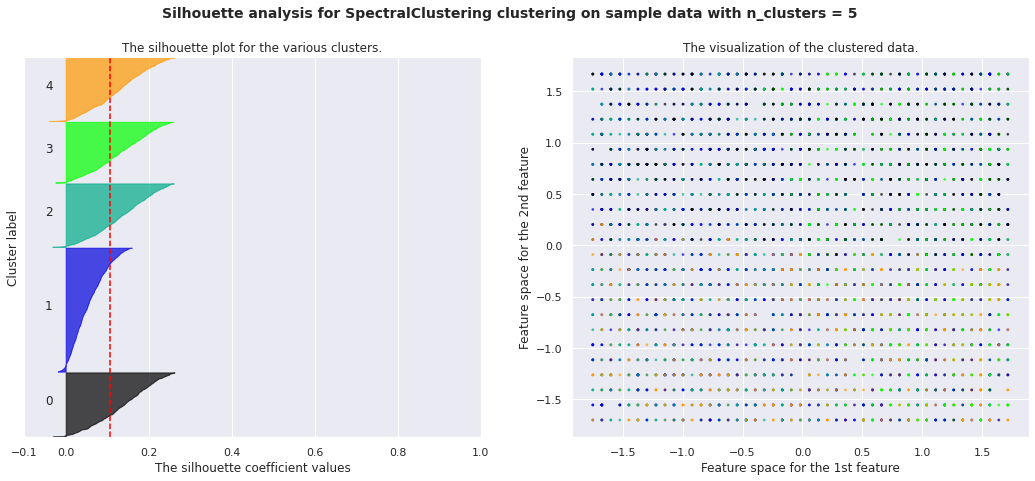

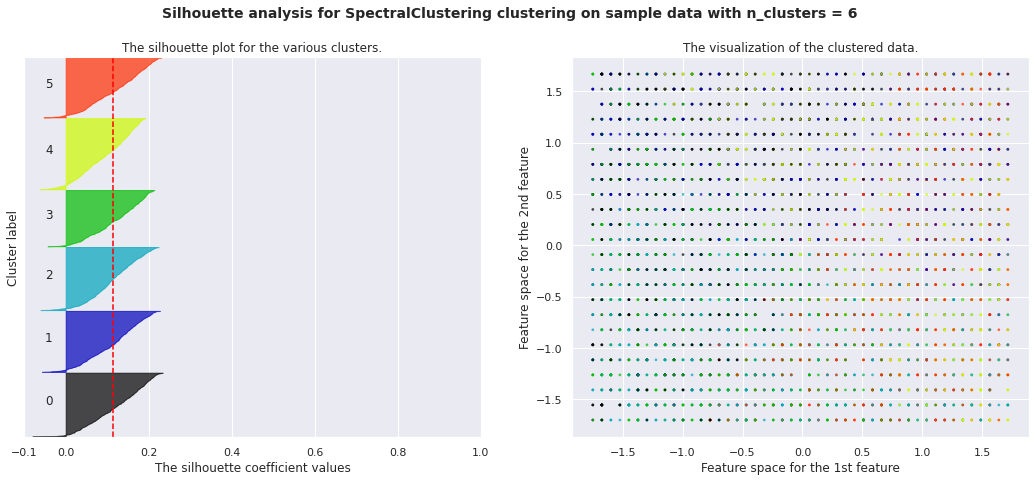

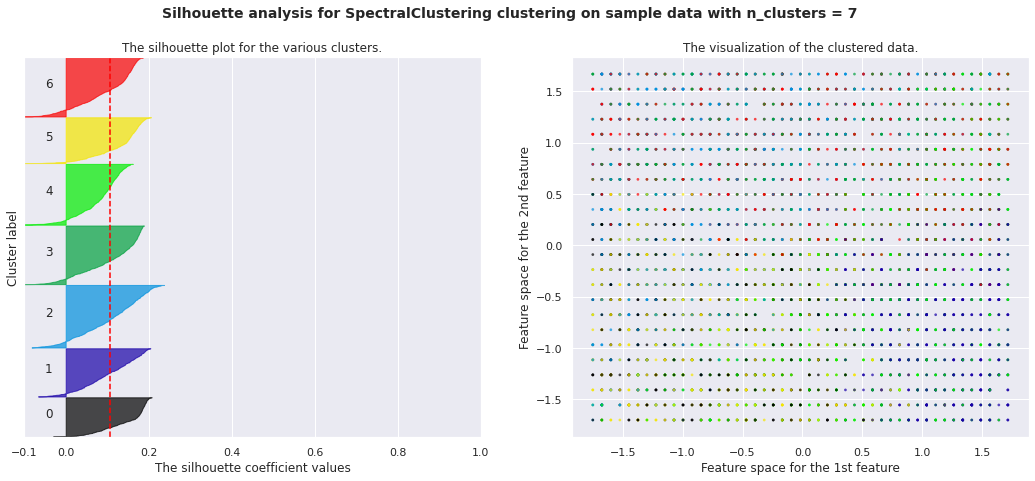

In [271]:
plot_silhouette(SpectralClustering,K,data_train_final,'SpectralClustering')

DApat terlihat dari evaluasi silhouette score dan visualisasinya jumlah cluster yang paling baik untuk model Spectral Clustering adalah 3 cluster

In [272]:
sc_tune = SpectralClustering(n_clusters=3)
sc_tune.fit(data_train_final)

SpectralClustering(n_clusters=3)

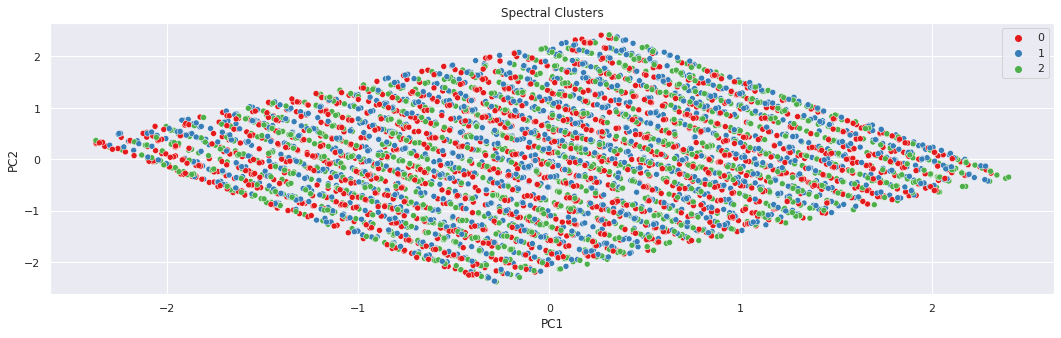

In [273]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x=pca_red[:, 0], y=pca_red[:, 1], hue=sc_tune.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral Clusters')
plt.show()

In [274]:
data_train['spectral'] = sc_tune.fit_predict(data_train_final)
data_train

Nama_Lokasi Merek_HP Digital_Interest   Location_Type  Usia  \
0         Coffee Toffee   xiaomi          cooking          Social  40.0   
1        Tang City Mall   xiaomi           beauty            Free  54.0   
2          Stuja Coffee   xiaomi          cooking          Social  17.0   
3      SMA N 28 Jakarta  samsung          cooking  Goes to School  37.0   
4         Coffee Toffee     vivo             tech          Social  39.0   
...                 ...      ...              ...             ...   ...   
4985      Coffee Toffee     vivo            games          Social  29.0   
4986      Coffee Toffee   xiaomi            sport          Social  50.0   
4987   SMA N 28 Jakarta     oppo    entertainment  Goes to School  56.0   
4988  Foresthree Coffee     oppo          science          Social  58.0   
4989       Stuja Coffee     vivo            games          Social  33.0   

      Jam_Login_Rounded  lof  kmeans  dbscan  spectral  
0                    11    1       2       0         0  
1                    18    1       3       1         2  
2                    16    1       1       0         0  
3                    15    1       1       2         1  
4                    10    1       2       0         0  
...                 ...  ...     ...     ...       ...  
4985                 17    1       1       0         0  
4986                  9    1       2       0         0  
4987                 16    1       3       2         1  
4988                 13    1       3       0         0  
4989                 22    1       1       0         0  

[4990 rows x 10 columns]

Text(0.5, 1.0, 'Cluster Proportion')

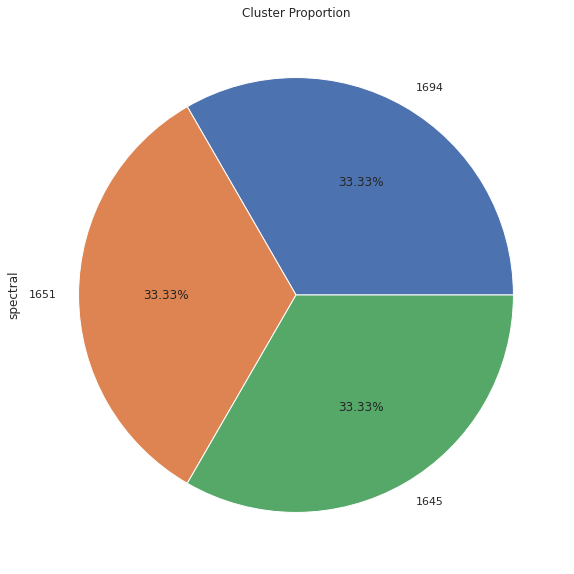

In [275]:
data_train['spectral'].value_counts().value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Cluster Proportion')

CLuster yang dihasilkan dari model Spectral Clustering memiliki proporsi yang sama rata antara masing-masing cluster

### 8.4 Calinski-Harabasz Score
Peneliti akan melakukan evaluasi terhadap masing-masing performa model dengan Calinski-Harabasz Score. Metric Calinski-Harabasz Score adalah metric yang mengukur jarak antara data dalam cluster dan jarak antara masing-masing cluster yang dibuat model. Skor yang tinggi berarti model dapat mengelompokkan cluster dengan baik.

In [276]:
modellist = kmeans_tune,dbs_tune,sc_tune
score = []
model = []
for x in modellist:
  labels = x.labels_
  y = calinski_harabasz_score(data_train_final, labels)
  score.append(y)
  model.append(str(x))


result = pd.DataFrame(data=zip(score, model), columns=['score','model'])
result

score                                  model
0  663.132974  KMeans(n_clusters=4, random_state=50)
1  510.351474                        DBSCAN(eps=1.8)
2  510.351474       SpectralClustering(n_clusters=3)

Cluster yang dihasilkan oleh model KMeans memiliki Calinski-Harabasz Score yang paling baik sehingga dapat disimpulkan model KMeans adalah model yang paling baik digunakan untuk clustering pada dataset ini.

### 8.5 Cluster EDA

In [277]:
data_train.head()

Nama_Lokasi Merek_HP Digital_Interest   Location_Type  Usia  \
0     Coffee Toffee   xiaomi          cooking          Social  40.0   
1    Tang City Mall   xiaomi           beauty            Free  54.0   
2      Stuja Coffee   xiaomi          cooking          Social  17.0   
3  SMA N 28 Jakarta  samsung          cooking  Goes to School  37.0   
4     Coffee Toffee     vivo             tech          Social  39.0   

   Jam_Login_Rounded  lof  kmeans  dbscan  spectral  
0                 11    1       2       0         0  
1                 18    1       3       1         2  
2                 16    1       1       0         0  
3                 15    1       1       2         1  
4                 10    1       2       0         0

In [278]:
data_eda = data_train.drop(columns=['lof', 'dbscan', 'spectral'], axis=1)

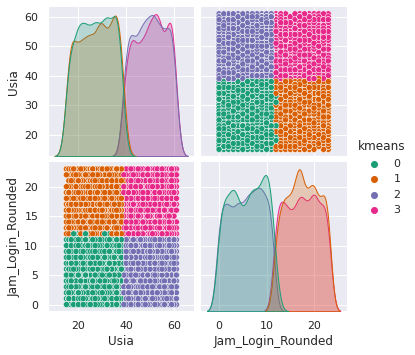

In [279]:
sns.pairplot(data_eda,hue='kmeans',palette='Dark2')

* Cluster 0 adalah cluster dengan usia yang lebih muda dan jam login yang lebih awal
* Cluster 1 adalah cluster dengan usia yang lebih muda dan jam login yang lebih larut
* Cluster 2 adalah cluster dengan usia yang lebih tua dan jam login yang lebih awal
* Cluster 3 adalah cluster dengan usia yang lebih tua dan jam login yang lebih larut

Text(0.5, 1.0, 'Frekuensi Login sesuai Location Type')

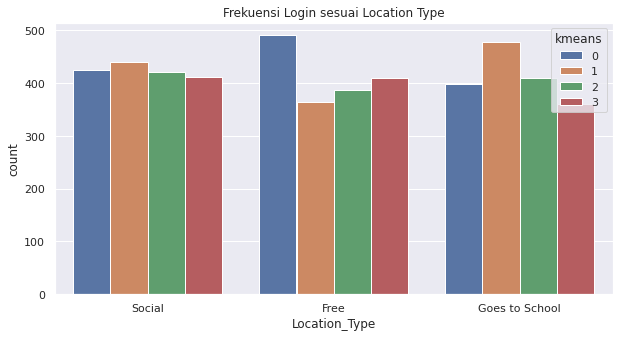

In [280]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Location_Type', data=data_train, hue='kmeans')
plt.title('Frekuensi Login sesuai Location Type')

Cluster 0 dan 1 yang merupakan konsumen yang lebih muda cenderung ditemukan kebanyakan di location type free dan goes to school. Smentara itu cluster 2 paling banyak ditemukan pada location type social dan cluster 3 pada location type free

Text(0.5, 1.0, 'Frekuensi Login sesuai Location Type')

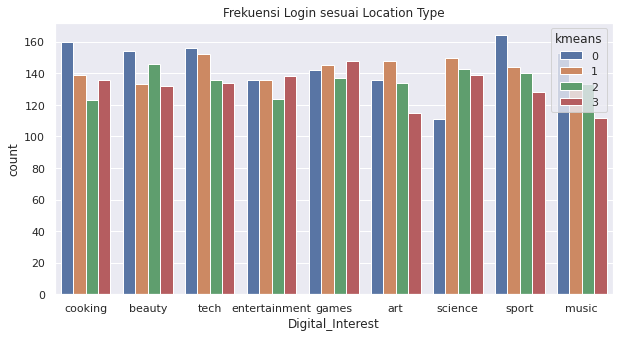

In [281]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Digital_Interest', data=data_train, hue='kmeans')
plt.title('Frekuensi Login sesuai Location Type')

Frekuensi cluster 0 paling banyak terdapat pada interest sport. Sementara itu frekuensi cluster 1 terbanyak terdapat pada tech. Cluster 2 ditemukan frekuensi terbanyaknya pada beauty dan cluster 3 pada games.

Text(0.5, 1.0, 'Frekuensi Login sesuai Location Type')

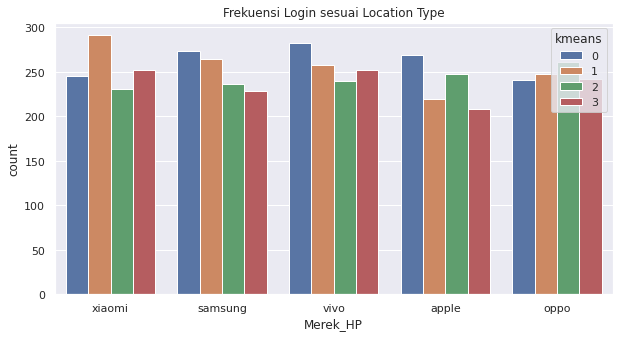

In [282]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Merek_HP', data=data_train, hue='kmeans')
plt.title('Frekuensi Login sesuai Location Type')

Cluster 0 paling sering ditemukan memiliki hp dengan merek Vivo, cluster 1 Xiaomi, cluster 2 Oppo dan cluster 3 juga Vivo 

Berdasarkan hasil EDA singkat pada hasil clustering dari model dapat disimpulkan bahwa kriteria yang paling signifikan dalam pengelompokkan cluster adalah berdasarkan dari usia customer dan jam login yang mereka lakukan.

In [325]:
print('Cluster 0 upper age range',data_train[(data_train['kmeans']==0)][['Usia']].sort_values(by='Usia').head(1))
print('Cluster 0 lower age range',data_train[(data_train['kmeans']==0)][['Usia']].sort_values(by='Usia').tail(1))
print('')
print('Cluster 0 upper hour range',data_train[(data_train['kmeans']==0)][['Jam_Login_Rounded']].sort_values(by='Jam_Login_Rounded').head(1))
print('Cluster 0 lower hour range',data_train[(data_train['kmeans']==0)][['Jam_Login_Rounded']].sort_values(by='Jam_Login_Rounded').tail(1))

Cluster 0 upper age range       Usia
2991  15.0
Cluster 0 lower age range       Usia
3575  39.0

Cluster 0 upper hour range       Jam_Login_Rounded
4450                  0
Cluster 0 lower hour range       Jam_Login_Rounded
1042                 12


Cluster 0 adalah customer dengan rentang usia 15-39 dan jam login 0-12



In [326]:
print('Cluster 1 upper age range',data_train[(data_train['kmeans']==1)][['Usia']].sort_values(by='Usia').head(1))
print('Cluster 1 lower age range',data_train[(data_train['kmeans']==1)][['Usia']].sort_values(by='Usia').tail(1))
print('')
print('Cluster 1 upper hour range',data_train[(data_train['kmeans']==1)][['Jam_Login_Rounded']].sort_values(by='Jam_Login_Rounded').head(1))
print('Cluster 1 lower hour range',data_train[(data_train['kmeans']==1)][['Jam_Login_Rounded']].sort_values(by='Jam_Login_Rounded').tail(1))

Cluster 1 upper age range      Usia
563  15.0
Cluster 1 lower age range       Usia
4793  39.0

Cluster 1 upper hour range       Jam_Login_Rounded
3217                 12
Cluster 1 lower hour range       Jam_Login_Rounded
2914                 23


Cluster 1 adalah customer dengan rentang usia 15-39 dan jam login 12-23

In [327]:
print('Cluster 2 upper age range',data_train[(data_train['kmeans']==2)][['Usia']].sort_values(by='Usia').head(1))
print('Cluster 2 lower age range',data_train[(data_train['kmeans']==2)][['Usia']].sort_values(by='Usia').tail(1))
print('')
print('Cluster 2 upper hour range',data_train[(data_train['kmeans']==2)][['Jam_Login_Rounded']].sort_values(by='Jam_Login_Rounded').head(1))
print('Cluster 2 lower hour range',data_train[(data_train['kmeans']==2)][['Jam_Login_Rounded']].sort_values(by='Jam_Login_Rounded').tail(1))

Cluster 2 upper age range       Usia
1737  38.0
Cluster 2 lower age range       Usia
3055  61.0

Cluster 2 upper hour range       Jam_Login_Rounded
2543                  0
Cluster 2 lower hour range    Jam_Login_Rounded
0                 11


Cluster 2 adalah customer dengan rentang usia 38-61 dan jam login 0-11



In [328]:
print('Cluster 3 upper age range',data_train[(data_train['kmeans']==3)][['Usia']].sort_values(by='Usia').head(1))
print('Cluster 3 lower age range',data_train[(data_train['kmeans']==3)][['Usia']].sort_values(by='Usia').tail(1))
print('')
print('Cluster 3 upper hour range',data_train[(data_train['kmeans']==3)][['Jam_Login_Rounded']].sort_values(by='Jam_Login_Rounded').head(1))
print('Cluster 3 lower hour range',data_train[(data_train['kmeans']==3)][['Jam_Login_Rounded']].sort_values(by='Jam_Login_Rounded').tail(1))

Cluster 3 upper age range      Usia
619  38.0
Cluster 3 lower age range       Usia
1849  61.0

Cluster 3 upper hour range       Jam_Login_Rounded
3600                 12
Cluster 3 lower hour range       Jam_Login_Rounded
4458                 23


Cluster 3 adalah customer dengan rentang usia 38-61 dan jam login 12-23



## 9. Model Inference

### 9.1 Make Pipeline

In [295]:
num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_cols),
    ('pipe_cat', cat_pipeline, cat_cols)
])

# final pipeline
final_pipeline = make_pipeline(data_pipeline, kmeans_tune)

In [297]:
final_pipeline.fit(data_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Usia',
                                                   'Jam_Login_Rounded']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Nama_Lokasi', 'Merek_HP',
                                                   'Digital_Interest',
                                                   'Location_Type'])])),
                ('kmeans', KMeans(n_clusters=4, random_state=50))])

### 9.1 Model Saving

In [298]:
with open("cluster_pipe.pkl", "wb") as model_file:
    pickle.dump(final_pipeline, model_file)

### 9.2 Model Loading

In [299]:
with open("cluster_pipe.pkl", "rb") as model_file:
    cluster = pickle.load(model_file)

### 9.3 Model Inferencing

In [287]:
data_inf

Nama_Lokasi Merek_HP Digital_Interest   Location_Type  Usia  \
0            Coffee Toffee     oppo           beauty          Social  46.0   
1         SMA N 27 Jakarta  samsung             tech  Goes to School  54.0   
2           Tang City Mall     vivo             tech            Free  31.0   
3           Tang City Mall   xiaomi            music            Free  58.0   
4  Grand Metropolitan Mall     oppo          cooking            Free  48.0   
5         SMA N 28 Jakarta   xiaomi          science  Goes to School  27.0   
6          Jogja City Mall     vivo          science            Free  58.0   
7         SMA N 27 Jakarta     vivo          science  Goes to School  46.0   
8        Foresthree Coffee     oppo             tech          Social  46.0   
9         SMA N 47 Jakarta     vivo           beauty  Goes to School  45.0   

   Jam_Login_Rounded  
0                 13  
1                 23  
2                 10  
3                  6  
4                 10  
5                 10  
6                 14  
7                 18  
8                  3  
9                  2

In [300]:
data_inf['predict'] = cluster.fit_predict(data_inf)

In [301]:
data_inf

Nama_Lokasi Merek_HP Digital_Interest   Location_Type  Usia  \
0            Coffee Toffee     oppo           beauty          Social  46.0   
1         SMA N 27 Jakarta  samsung             tech  Goes to School  54.0   
2           Tang City Mall     vivo             tech            Free  31.0   
3           Tang City Mall   xiaomi            music            Free  58.0   
4  Grand Metropolitan Mall     oppo          cooking            Free  48.0   
5         SMA N 28 Jakarta   xiaomi          science  Goes to School  27.0   
6          Jogja City Mall     vivo          science            Free  58.0   
7         SMA N 27 Jakarta     vivo          science  Goes to School  46.0   
8        Foresthree Coffee     oppo             tech          Social  46.0   
9         SMA N 47 Jakarta     vivo           beauty  Goes to School  45.0   

   Jam_Login_Rounded  predict  
0                 13        2  
1                 23        3  
2                 10        1  
3                  6        0  
4                 10        2  
5                 10        1  
6                 14        0  
7                 18        3  
8                  3        2  
9                  2        2

Text(0.5, 1.0, 'Cluster Proportion')

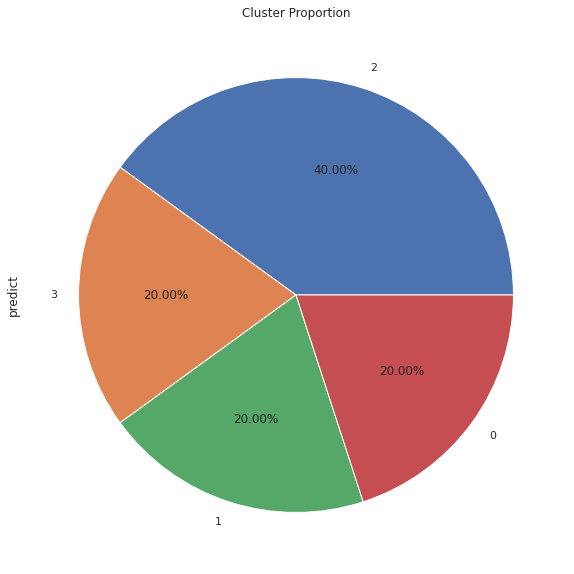

In [303]:
data_inf['predict'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Cluster Proportion')

Mayoritas data inf mendapatkan cluster 2 dengan usia diatas 45 tahun dan jam login dibawah 14.00

## 10. Kesimpulan


* Jam dengan frekuensi login terbannyak adalah pukul 17.00, 20.00 dan 10.00. Pada jam yang memiliki frekuensi login tinggi tersebut perusahaan bisa memberlakuan pricing yang lebih premium pada pengiklan.

* Lokasi yang paling banyak frekuensi loginnya adalah Stuja Coffee, SMA N 27 Jakarta dan Jogja City Mall. Lokasi yang cukup populer tersebut dapat dimanfaatkan untuk mendongkrak pricing yang diberlakukan pada pengiklan

* Beberapa lokasi seperti Jogja City Mall memiliki rata-rata jam login yang lebih awal sehingga kesempatan paling baik dalam memasang iklan adalah saat pagi hari. Sementara itu di Tang City Mall rata-rata jam login lebih siang sehingga iklan lebih banyak kesempatan untuk iklan yang dipasang dilihat oleh customer pada siang hari

* Berdasarkan location type tidak ada proporsi yang berbeda secara signifikan antara masing-masing kelas. Namun kelas dengan frekuensi terbanyak adalah location type social. 

* Location type yang memiliki rata-rata login paling pagi adalah location type free dan yang paling larut adalah location type goes to school. Pada location type oes to school kemungkinan besar customernya adalah anak sekolahan yang paginya mengikuti kegiatan belajar mengajar sehingga hanya bisa login ketika jam istirahat atau pulang sekolah. Sementara itu pengunjung location type free adalah masyarakat umum yang tidak terikat dengan suatu kegiatan tertensu sehingga kerap login lebih awal. Penempatan iklan pada tiap location type dapat mengacu pada temuan ini agar bisa memaksimalkan iklan tersebut dilihat customer.

* Ditemukan digital interest yang paling populer dikalangan customer adalah tech, sport dan games. Sehingga prioritas iklan yang harus dipasang adalah iklan yang berkaitan dengan interest yang populer agar memaksimalkan impact dari iklan itu sendiri.

* Berdasarkan location typenya ditemukan bahwa location type social interest yang paling populer adala tech, games dan music. Pada location type free yang paling poluler adalah games, beauty dan tech. Terakhir pada location type goes to school interest yang paling populer adalah sport beauty dan tech. Temuan tersebut dapat digunakan menjadi pertimbangan dalam memilah konten iklan yang akan diiklankan agar sesuai dengan target iklannya.

* Berdasarkan waktunya interest customer diakses dengan pola jam login yang cukup merata. Terdapat pengecualian yaitu music dan sport yang diakses dengan jam login yang cukup awal. Hal tersebut kemungkinan karena banyak customer yang mengawali hari dengan melakukan olahraga atau pun mendegarkan music. Sehingga iklan dengan konten yang berhubungan dengan sport maupun music sangat tepat untuk ditampilkan pada pagi hari.

* Merek HP yang paling populer dikalangan customer dari yang paling banyak dipakai hingga yang paling sedikit dipakai adalah Vivo, Xiaomi, Samsung, Oppo dan Apple. Melihat temuan tersebut terdapat potensi kerjasama yang bisa dilakukan perusahaan dengan produsen HP yang populer di kalangan customer seperti Vivo maupun Xiaomi untuk bisa menampilkan iklannya pada platform HIGO.

* Sebaran usia customer tergolong cukup normal dengan mayoritas berada diatas 30 tahun dan dibawah 50 tahun. Sehingga iklan yang ditampilkan sebaikknya memiliki appeal pada customer dengan rentang usia tersebut.

* Model clustering yang dapat mengelompokkan data dengan performa paling baik adalah KMeans Clustering. Model tersebut telah dibandingkan dengan model lainya yaitu DBSCAN dan Spectral Clustering lalu kemudian dievaluasi dengan menggunakan metric Calinski-Harabasz Score. Hasil evaluasi tersebut menunjukkan bahwa Model KMeans memiliki score yang paling baik. Selain itu dari hasil visualisasi clustering dengan PCA ditemukan bahwa tidak terdapat overlap antara masing-masing cluster dalam Model KMeans. Lain halnya dengan visualisasi PCA pada model DBSCAN dan Spectral CLusteriing yang menunjukkan adanya overlap antara cluster. Sehingga yang direkomendasikan sebagai model clustering untuk melakukan segmentasi customer pada dataset ini adalah Model Kmeans

* Clustering yang dihasilkan dari model menghasilkan 4 cluster yang berbeda dengan proprosi sayng hampir seimbang diantara masing-masing cluster. Cluster yang terbentuk yaitu :
  * Cluster 0 adalah customer dengan rentang usia 15-39 dan jam login 0-12
  * Cluster 1 adalah customer dengan rentang usia 15-39 dan jam login 12-23
  * Cluster 2 adalah customer dengan rentang usia 38-61 dan jam login 0-11
  * Cluster 3 adalah customer dengan rentang usia 38-61 dan jam login 12-23

* Hasil clustering tersebut dapat digunakan sebagai dasar segmentasi customer agar setiap customer dapat mendapatkan iklan yang sesuai dengan usia dan juga waktu yang optimal. Menurut Goodrich (2011), usia customer yang lebih muda cenderung memproses iklan secara lebih mendetil sedangkan customer yang lebih tua cenderung menanggapi iklan secara lebih heuristik. Sementara itu waktu iklan juga memiliki pengaruh dalam rentang atensi customer. Customer dengan usia yang lebih muda cenderung memproses iklan secara mendetil sepanjang hari. Akan tetapi customer yang lebih tua hanya bisa memproses dengan detil pada pagi hari namun tidak ketika larut hari. Sehingga clustering yang telah dibuat dapat digunakan untuk menentukan jadwal iklan yang sesuai dengan segmentasi customer. Customer dalam cluster 0 dan 2 dapat diberikan iklan yang memiliki detil informasi yang banyak sepanjang hari. Kemudia customer pada cluster 2 dabat diberikan iklan yang memiliki detil informasi yang banyak hanya dipagi hari. Sementara sebaiknya tidak ada iklan yang membutuhkan customer pada cluster 3 untuk memproses banyak informasi.

Source : 

Goodrich, K. (2011, January). *Effects of age and time of day on Internet advertising outcomes*. Journal of Marketing Communications. https://www.researchgate.net/publication/254317097_Effects_of_age_and_time_of_day_on_Internet_advertising_outcomes